In [22]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
import requests

url = "https://www.dropbox.com/scl/fo/4a0c26qwe7yc9jgvg9a20/AEvoBfxkjlvBc309FVQj-QA?rlkey=tyc3q3mfs613wlpndhkrxyfmz&st=bca813kn&dl=0"
local_filename = "dataset.zip"

with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print(f"Downloaded file saved as {local_filename}")


Downloaded file saved as dataset.zip


In [25]:
# Download file with PowerShell Invoke-WebRequest (run in notebook cell or Python with !)

# Unzip with Python
import zipfile

with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted_dataset")

print("Download and unzip complete!")


BadZipFile: File is not a zip file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy


#  Building our Model To train the data 

In [27]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [28]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [32]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(
    directory=r"E:\download\Emotion-detection-main\Emotion-detection-main\train\train",  # full path
    target_size=(224, 224),
    batch_size=32,
)



train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [33]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= r"E:\download\Emotion-detection-main\Emotion-detection-main\train\train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

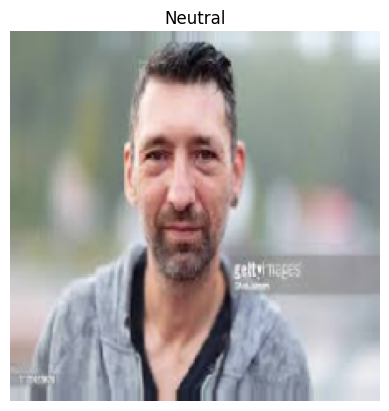

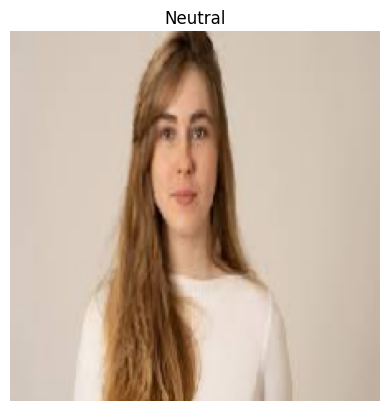

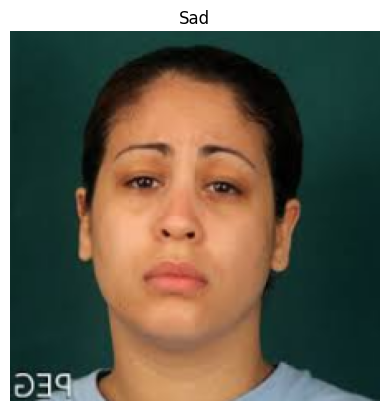

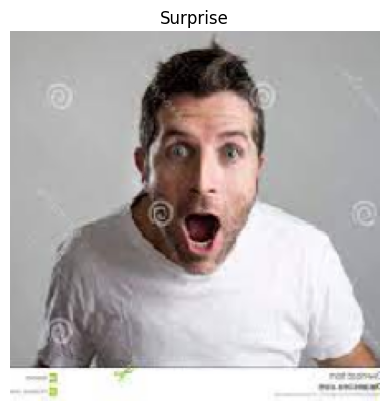

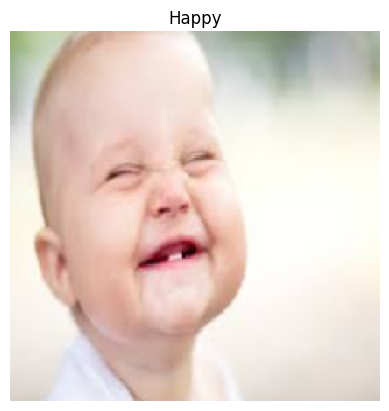

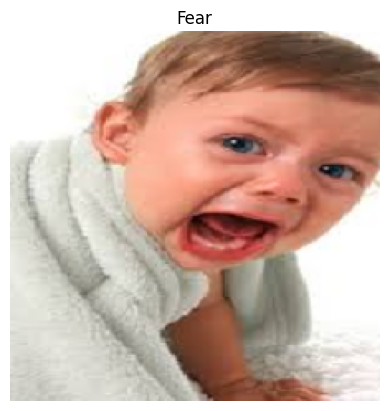

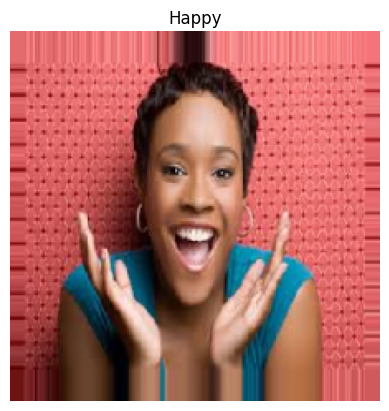

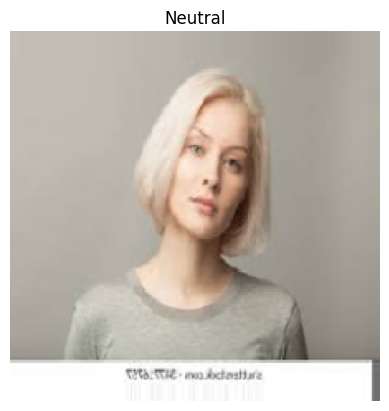

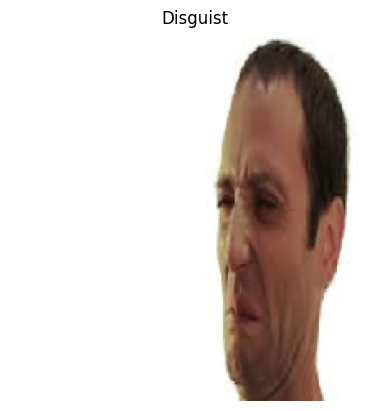

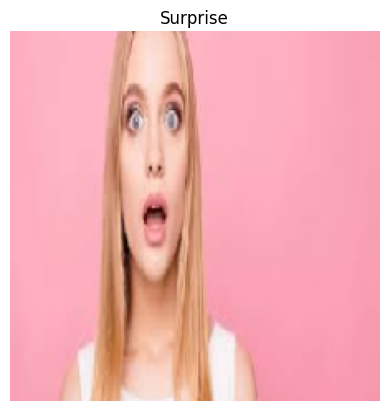

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels from the generator
t_img, label = next(train_data)   # use next() function

# Map numeric labels to class names
label_map = {v: k for k, v in train_data.class_indices.items()}

def plotImages(img_arr, labels):
    count = 0
    for im, lbl in zip(img_arr, labels):
        plt.imshow(im)
        # If labels are one-hot encoded, get class index by argmax
        if len(lbl.shape) > 0:
            class_idx = np.argmax(lbl)
        else:
            class_idx = lbl

        plt.title(label_map[class_idx])
        plt.axis('off')
        plt.show()
        count += 1
        if count == 10:
            break

plotImages(t_img, label)


# having early stopping and model check point

In [38]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [40]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)


e:\download\Emotion-detection-main\Emotion-detection-main\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.1887 - loss: 7.9782
Epoch 1: val_accuracy improved from -inf to 0.52734, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1907 - loss: 8.0609 - val_accuracy: 0.5273 - val_loss: 3.9628
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.2188 - loss: 6.6727

e:\download\Emotion-detection-main\Emotion-detection-main\.venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.52734 to 0.63281, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - accuracy: 0.2188 - loss: 6.6727 - val_accuracy: 0.6328 - val_loss: 2.2969
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.6034 - loss: 3.2224
Epoch 3: val_accuracy improved from 0.63281 to 0.79688, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 961ms/step - accuracy: 0.6037 - loss: 3.2011 - val_accuracy: 0.7969 - val_loss: 1.0677
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.7812 - loss: 2.2958
Epoch 4: val_accuracy did not improve from 0.79688
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.7812 - loss: 2.2958 - val_accuracy: 0.7656 - val_loss: 1.4244
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.7329 - loss: 1.6311
Epoch 5: val_accuracy improved from 0.79688 to 0.87109, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7348 - loss: 1.6115 - val_accuracy: 0.8711 - val_loss: 0.7510
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - accuracy: 0.6562 - loss: 1.8530
Epoch 6: val_accuracy did not improve from 0.87109
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 386ms/step - accuracy: 0.6562 - loss: 1.8530 - val_accuracy: 0.8633 - val_loss: 0.5650
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.8670 - loss: 0.6119
Epoch 7: val_accuracy improved from 0.87109 to 0.88281, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 952ms/step - accuracy: 0.8679 - loss: 0.6097 - val_accuracy: 0.8828 - val_loss: 0.6452
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.8125 - loss: 0.7885
Epoch 8: val_accuracy did not improve from 0.88281
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.8125 - loss: 0.7885 - val_accuracy: 0.8750 - val_loss: 0.6128
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.8585 - loss: 0.7064
Epoch 9: val_accuracy improved from 0.88281 to 0.96094, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 950ms/step - accuracy: 0.8602 - loss: 0.6972 - val_accuracy: 0.9609 - val_loss: 0.1300
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.9062 - loss: 0.2445
Epoch 10: val_accuracy improved from 0.96094 to 0.96484, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.9062 - loss: 0.2445 - val_accuracy: 0.9648 - val_loss: 0.1395
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9532 - loss: 0.2087
Epoch 11: val_accuracy did not improve from 0.96484
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 958ms/step - accuracy: 0.9532 - loss: 0.2060 - val_accuracy: 0.9648 - val_loss: 0.1142
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.9688 - loss: 0.0733
Epoch 12: val_accuracy did not improve from 0.96484
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.9688 - loss: 0.0733 - val_accuracy: 0.9648 - val_loss: 0.1031
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.9812 - loss: 0.0796
Epoch 13: val_accuracy improved from 0.96484 to 0.98438, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9809 - loss: 0.0799 - val_accuracy: 0.9844 - val_loss: 0.0428
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 1.0000 - loss: 0.0099
Epoch 14: val_accuracy did not improve from 0.98438
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.9805 - val_loss: 0.0630
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9825 - loss: 0.0735
Epoch 15: val_accuracy did not improve from 0.98438
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 944ms/step - accuracy: 0.9818 - loss: 0.0766 - val_accuracy: 0.9844 - val_loss: 0.0809
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step - accuracy: 1.0000 - loss: 0.0525
Epoch 16: val_accuracy improved from 0.98438 to 0.98828, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 1.0000 - loss: 0.0525 - val_accuracy: 0.9883 - val_loss: 0.0533
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9817 - loss: 0.0603
Epoch 17: val_accuracy did not improve from 0.98828
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 932ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9883 - val_loss: 0.0509
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 18: val_accuracy improved from 0.98828 to 0.99219, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9922 - val_loss: 0.0476
Epoch 18: early stopping


In [42]:
from keras.models import load_model

# Option 1: Use double backslashes
model = load_model("E:\\download\\Emotion-detection-main\\Emotion-detection-main\\best_model.h5")

# Option 2: Use a raw string
# model = load_model(r"E:\download\Emotion-detection-main_


In [43]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

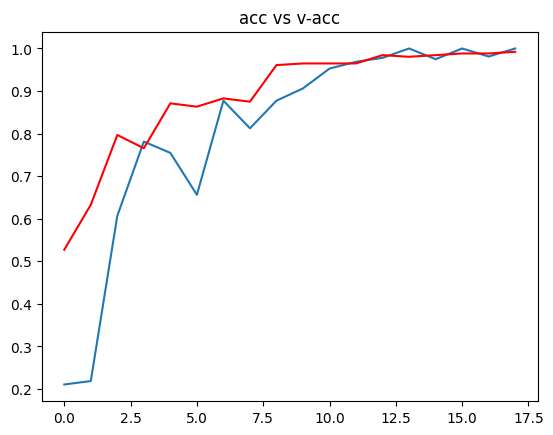

In [44]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

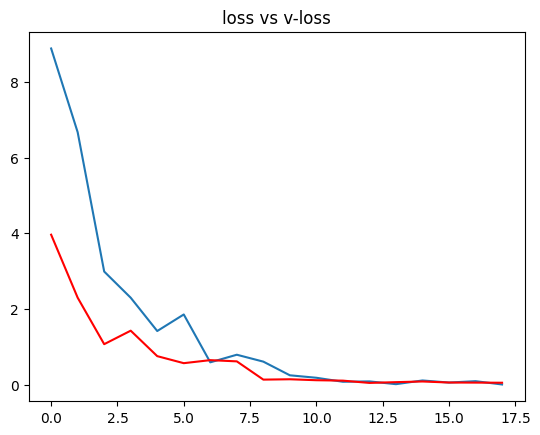

In [45]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [46]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
 the image is of Angry


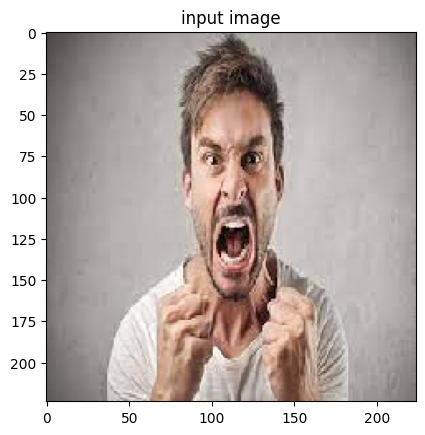

In [48]:
# path for the image to see if it predics correct class

path = r"E:\download\Emotion-detection-main\Emotion-detection-main\train\train\Angry\download (17).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

<function destroyAllWindows>

: 